Ref:
https://www.archrproject.com/bookdown/creating-an-archrproject-1.html

In [1]:
library(ArchR)
library(tidyverse)


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .______      
          /   \     |   _ 

In [2]:
getwd()

[1] "/nfs/team205/heart/anndata_objects/Foetal/multiome_ATAC/ArchR"

In [3]:
# before starting a project we must set the ArchRGenome and default threads for parallelization.
# Setting default genome to Hg38.
addArchRGenome("hg38")

Setting default genome to Hg38.



In [4]:
# Setting default number of Parallel threads to 16
addArchRThreads(threads = 10) 

Setting default number of Parallel threads to 10.



## Prepare Arrow files

* make arrow file list which contains cells from RNA data

In [5]:
# read in rna metadata
obs = read.csv('/nfs/team205/heart/anndata_objects/Foetal/Feb28ObjectRaw.obs.csv',row.names=1)

# select modality (multiome)
print(table(obs$kit_10x))
obs = obs %>% filter(kit_10x == "Multiome-v1")

# select columns
obs = obs %>% select('sangerID', 'combinedID', 'donor', 
       'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 
       'scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'n_genes', 'n_counts',
       'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts',
       'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt',
       'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo',
       'pct_counts_ribo', 'HB_score', 'donor_by_library.prep','multiplexed',
        'batch_key','region','FACSgate','sex','week','trimester',
                     'fine_grain','mid_grain','coarse_grain',
                     'heart_or_greatvessels','cycling','S_score','G2M_score','phase','stress_score','hb1_score')

print(dim(obs))
head(obs)


  3prime-v3   5prime-v2 Multiome-v1 
      39718       46610      211145 
[1] 211145     41


,sangerID,combinedID,donor,facility,cell_or_nuclei,modality,kit_10x,scrublet_score,doublet_pval,doublet_bh_pval,⋯,fine_grain,mid_grain,coarse_grain,heart_or_greatvessels,cycling,S_score,G2M_score,phase,stress_score,hb1_score
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
BHF_F_Hea11064670_BHF_F_Hea11031823_TTGCTTAGTGAGACTC-1,BHF_F_Hea11064670,BHF_F_Hea11064670_BHF_F_Hea11031823,C82,Sanger,nuclei,scMultiome,Multiome-v1,0.13501144,0.1990455,0.8997827,⋯,VentricularCardiomyocytesLeftTrabeculated,VentricularCardiomyocytes,Cardiomyocytes,heart,yes,0.05947771,-0.10420375,S,-0.4060466,0.22014843
BHF_F_Hea11064670_BHF_F_Hea11031823_ATAGATGCATTGTCCT-1,BHF_F_Hea11064670,BHF_F_Hea11064670_BHF_F_Hea11031823,C82,Sanger,nuclei,scMultiome,Multiome-v1,0.08474576,0.6188959,0.8997827,⋯,MesothelialEpicardialCells,EpicardialCells,Epicardium,heart,yes,0.72685075,0.14721541,S,-0.5391905,0.06348125
BHF_F_Hea11064670_BHF_F_Hea11031823_GTACACCCATCCCTCA-1,BHF_F_Hea11064670,BHF_F_Hea11064670_BHF_F_Hea11031823,C82,Sanger,nuclei,scMultiome,Multiome-v1,0.13501144,0.6188959,0.8997827,⋯,AtrioventricularNodeCardiomyocytes,CardiacConductionSystem,Cardiomyocytes,heart,no,-0.13155641,-0.02149749,G1,-0.2801627,0.46772449
BHF_F_Hea11064670_BHF_F_Hea11031823_GGTCGGTTCTTAGGAC-1,BHF_F_Hea11064670,BHF_F_Hea11064670_BHF_F_Hea11031823,C82,Sanger,nuclei,scMultiome,Multiome-v1,0.10344828,0.6188959,0.8997827,⋯,AtrialCardiomyocytesLeft,AtrialCardiomyocytes,Cardiomyocytes,heart,no,-0.11053056,-0.12320330,G1,-0.3152919,0.17567254
BHF_F_Hea11064670_BHF_F_Hea11031823_GGAACAATCAAGCTTA-1,BHF_F_Hea11064670,BHF_F_Hea11064670_BHF_F_Hea11031823,C82,Sanger,nuclei,scMultiome,Multiome-v1,0.14285714,0.4540552,0.8997827,⋯,ChromaffinCells,Neurons,Neural,mix,no,-0.22254897,-0.31485358,G1,-0.3609344,-0.17583513
BHF_F_Hea11064670_BHF_F_Hea11031823_CGATCCTTCTTGTCCA-1,BHF_F_Hea11064670,BHF_F_Hea11064670_BHF_F_Hea11031823,C82,Sanger,nuclei,scMultiome,Multiome-v1,0.12101911,0.6188959,0.8997827,⋯,AtrialCardiomyocytesLeft,AtrialCardiomyocytes,Cardiomyocytes,heart,yes,0.01329928,-0.19417181,S,-0.4775024,0.56487702


In [6]:
# make arrow file list using combinedID
ArrowFiles = paste0(unique(obs$combinedID),'.arrow')
length(ArrowFiles)
ArrowFiles

[1] 37

[1] "BHF_F_Hea11064670_BHF_F_Hea11031823.arrow"  
 [2] "BHF_F_Hea11064671_BHF_F_Hea11031824.arrow"  
 [3] "BHF_F_Hea11064672_BHF_F_Hea11031825.arrow"  
 [4] "BHF_F_Hea11933666_BHF_F_Hea11596619.arrow"  
 [5] "BHF_F_Hea11933667_BHF_F_Hea11596620.arrow"  
 [6] "BHF_F_Hea11933668_BHF_F_Hea11596621.arrow"  
 [7] "BHF_F_Hea11933669_BHF_F_Hea11596622.arrow"  
 [8] "BHF_F_Hea11933670_BHF_F_Hea11596623.arrow"  
 [9] "BHF_F_Hea11933671_BHF_F_Hea11596624.arrow"  
[10] "BHF_F_Hea11933672_BHF_F_Hea11596625.arrow"  
[11] "BHF_F_Hea11933673_BHF_F_Hea11596626.arrow"  
[12] "BHF_F_Hea11933674_BHF_F_Hea11596627.arrow"  
[13] "BHF_F_Hea11933675_BHF_F_Hea11596628.arrow"  
[14] "BHF_F_Hea13188317_BHF_F_Hea13187619.arrow"  
[15] "BHF_F_Hea13188318_BHF_F_Hea13187620.arrow"  
[16] "BHF_F_Hea13188324_BHF_F_Hea13187626.arrow"  
[17] "BHF_F_Hea13188328_BHF_F_Hea13187630.arrow"  
[18] "BHF_F_Hea13188329_BHF_F_Hea13187631.arrow"  
[19] "BHF_F_Hea13188330_BHF_F_Hea13187632.arrow"  
[20] "BHF_F_Hea13168892_BHF_F_Hea13168508.arrow"  
[21] "BHF_F_Hea13168893_BHF_F_Hea13168509.arrow"  
[22] "BHF_F_Hea13168894_BHF_F_Hea13168510.arrow"  
[23] "BHF_F_Hea13168895_BHF_F_Hea13168511.arrow"  
[24] "BHF_F_Hea13168896_BHF_F_Hea13168512.arrow"  
[25] "BHF_F_Hea13168897_BHF_F_Hea13168513.arrow"  
[26] "BHF_F_Hea13168898_BHF_F_Hea13168514.arrow"  
[27] "BHF_F_Hea13168899_BHF_F_Hea13168515.arrow"  
[28] "7089STDY13216920_BHF_F_Hea13242527.arrow"   
[29] "7089STDY13216921_BHF_F_Hea13242528.arrow"   
[30] "7089STDY13216922_BHF_F_Hea13242529.arrow"   
[31] "7089STDY13216923_BHF_F_Hea13242530.arrow"   
[32] "7089STDY13216924_BHF_F_Hea13242531.arrow"   
[33] "7089STDY13216925_BHF_F_Hea13242532.arrow"   
[34] "7089STDY13216926_BHF_F_Hea13242533.arrow"   
[35] "7089STDY13216927_BHF_F_Hea13242534.arrow"   
[36] "HCAHeartST13386009_HCAHeartST13303419.arrow"
[37] "HCAHeartST13386010_HCAHeartST13303420.arrow"

## Create an ArchR Project

In [7]:
proj <- ArchRProject(
  ArrowFiles = ArrowFiles, 
  outputDirectory = "project_output",
  copyArrows = FALSE #This is recommened so that if you modify the Arrow files you have an original copy for later usage.
)
# copyArrows = FALSE since copy Arrows will be created when we save project file

Using GeneAnnotation set by addArchRGenome(Hg38)!

Using GeneAnnotation set by addArchRGenome(Hg38)!

Validating Arrows...

Getting SampleNames...



Getting Cell Metadata...



Merging Cell Metadata...

Initializing ArchRProject...


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,-

In [8]:
proj


           ___      .______        ______  __    __  .______      
          /   \     |   _  \      /      ||  |  |  | |   _  \     
         /  ^  \    |  |_)  |    |  ,----'|  |__|  | |  |_)  |    
        /  /_\  \   |      /     |  |     |   __   | |      /     
       /  _____  \  |  |\  \\___ |  `----.|  |  |  | |  |\  \\___.
      /__/     \__\ | _| `._____| \______||__|  |__| | _| `._____|
    



class: ArchRProject 
outputDirectory: /nfs/team205/heart/anndata_objects/Foetal/multiome_ATAC/ArchR/project_output 
samples(37): BHF_F_Hea11064670_BHF_F_Hea11031823
  BHF_F_Hea11064671_BHF_F_Hea11031824 ...
  HCAHeartST13386009_HCAHeartST13303419
  HCAHeartST13386010_HCAHeartST13303420
sampleColData names(1): ArrowFiles
cellColData names(13): Sample TSSEnrichment ... nDiFrags BlacklistRatio
numberOfCells(1): 497607
medianTSS(1): 11.159
medianFrags(1): 8628

In [9]:
colnames(proj@cellColData)

[1] "Sample"           "TSSEnrichment"    "ReadsInTSS"       "ReadsInPromoter" 
 [5] "ReadsInBlacklist" "PromoterRatio"    "PassQC"           "NucleosomeRatio" 
 [9] "nMultiFrags"      "nMonoFrags"       "nFrags"           "nDiFrags"        
[13] "BlacklistRatio"

In [10]:
paste0("Memory Size = ", round(object.size(proj) / 10^6, 3), " MB")

[1] "Memory Size = 165.591 MB"

In [11]:
# getAvailableMatrices(proj)

## Plotting

Length of unique values greater than palette, interpolating..

1 




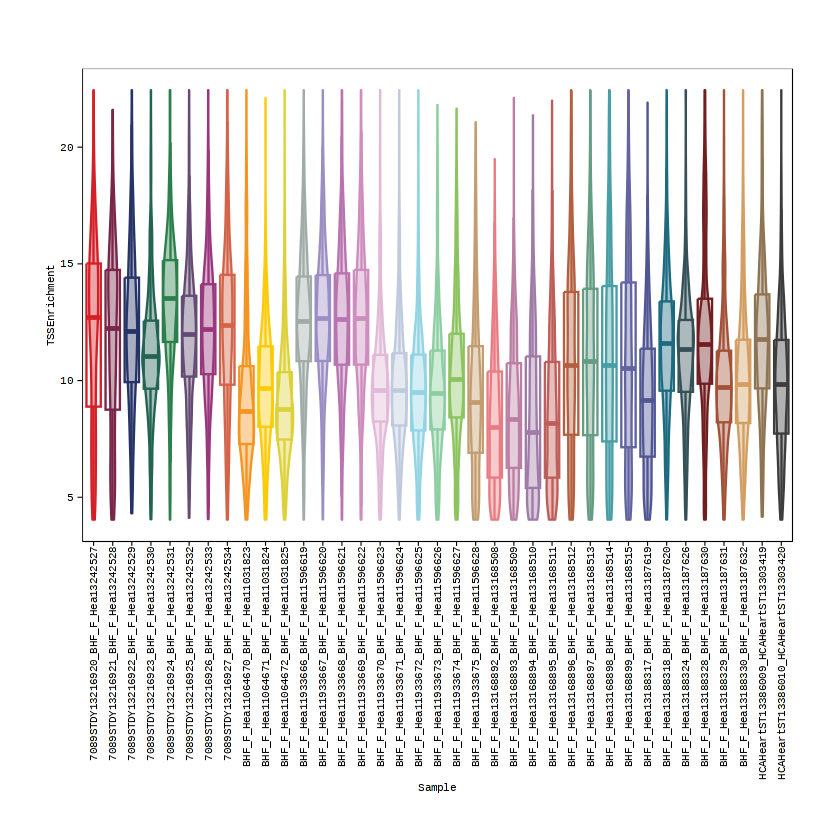

In [12]:
# TSS enrichment score
p1 <- plotGroups(
    ArchRProj = proj, 
    groupBy = "Sample", 
    colorBy = "cellColData", 
    name = "TSSEnrichment",
    plotAs = "violin",
    alpha = 0.4,
    addBoxPlot = TRUE
   )
p1

Length of unique values greater than palette, interpolating..

1 




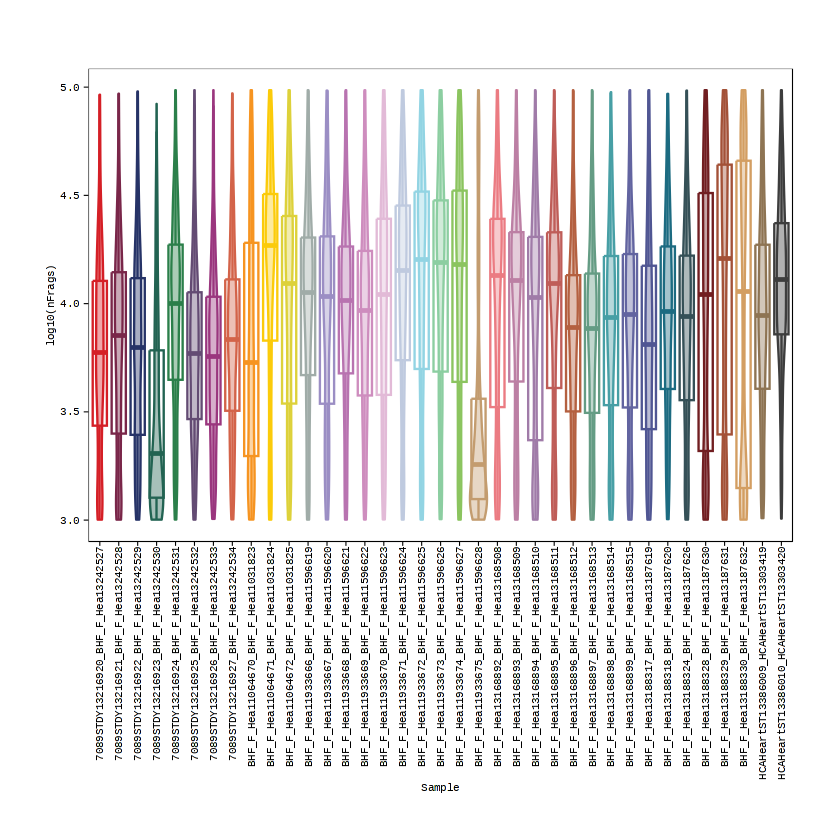

In [13]:
# log10(unique nuclear fragments)
p2 <- plotGroups(
    ArchRProj = proj, 
    groupBy = "Sample", 
    colorBy = "cellColData", 
    name = "log10(nFrags)",
    plotAs = "violin",
    alpha = 0.4,
    addBoxPlot = TRUE
   )
p2

In [14]:
plotPDF(p1,p2, name = "QC-Sample-Statistics.pdf", ArchRProj = proj, addDOC = FALSE, width = 8, height = 5)

Plotting Ggplot!

Plotting Ggplot!



## Add fine-grained cell type annotation from RNA data

In [15]:
# change cell names to match with .obs metadata
proj$cellNames_mod = gsub("#", "_", proj$cellNames)
proj$cellNames_mod[1:10]

[1] "BHF_F_Hea11064670_BHF_F_Hea11031823_TACGCACCACTAGGTC-1"
 [2] "BHF_F_Hea11064670_BHF_F_Hea11031823_ACTATCCGTGGTTCTT-1"
 [3] "BHF_F_Hea11064670_BHF_F_Hea11031823_GATCAGGCAGTTAGCC-1"
 [4] "BHF_F_Hea11064670_BHF_F_Hea11031823_GTGTCCAAGCTGCACA-1"
 [5] "BHF_F_Hea11064670_BHF_F_Hea11031823_TGGCCTGCACATGCTA-1"
 [6] "BHF_F_Hea11064670_BHF_F_Hea11031823_CAATGTCAGGGTCTAT-1"
 [7] "BHF_F_Hea11064670_BHF_F_Hea11031823_TCACTGACATTGGGAG-1"
 [8] "BHF_F_Hea11064670_BHF_F_Hea11031823_GATTACGGTGAGAAAC-1"
 [9] "BHF_F_Hea11064670_BHF_F_Hea11031823_AAGCCACGTAGGTTTG-1"
[10] "BHF_F_Hea11064670_BHF_F_Hea11031823_CGTCATTGTGGTTCTT-1"

In [16]:
# keep cellColData dataframe for later use
cellColData_prefilter = proj@cellColData

# select shared cells between RNA and ATAC
shared_cells = intersect(proj$cellNames_mod, rownames(obs))
length(shared_cells)

# select shared cells fromr the ArchR pobject
idxSample <- BiocGenerics::which(proj$cellNames_mod %in% shared_cells)
cellsSample <- proj$cellNames[idxSample]
proj = proj[cellsSample, ]
proj

# select shared cells fromr the .obs metadata
obs = obs[proj$cellNames_mod, ]
dim(obs)

[1] 167022


           ___      .______        ______  __    __  .______      
          /   \     |   _  \      /      ||  |  |  | |   _  \     
         /  ^  \    |  |_)  |    |  ,----'|  |__|  | |  |_)  |    
        /  /_\  \   |      /     |  |     |   __   | |      /     
       /  _____  \  |  |\  \\___ |  `----.|  |  |  | |  |\  \\___.
      /__/     \__\ | _| `._____| \______||__|  |__| | _| `._____|
    



class: ArchRProject 
outputDirectory: /nfs/team205/heart/anndata_objects/Foetal/multiome_ATAC/ArchR/project_output 
samples(37): BHF_F_Hea11064670_BHF_F_Hea11031823
  BHF_F_Hea11064671_BHF_F_Hea11031824 ...
  HCAHeartST13386009_HCAHeartST13303419
  HCAHeartST13386010_HCAHeartST13303420
sampleColData names(1): ArrowFiles
cellColData names(14): Sample TSSEnrichment ... BlacklistRatio
  cellNames_mod
numberOfCells(1): 167022
medianTSS(1): 11.614
medianFrags(1): 10338.5

[1] 167022     41

In [17]:
# add metadata
for (c in colnames(obs)){
    proj = addCellColData(ArchRProj = proj, data = obs[[c]], cells = proj$cellNames, name = c)
}

In [18]:
table(proj$coarse_grain)


Cardiomyocytes    Endothelium     Epicardium     Leukocytes    Mesenchymal 
         53512           8859           1554          21340          78731 
        Neural 
          3026 

In [19]:
table(proj$fine_grain)


               AtrialCardiomyocytesCycling 
                                      1597 
                  AtrialCardiomyocytesLeft 
                                      4777 
                 AtrialCardiomyocytesRight 
                                      8187 
        AtrioventricularNodeCardiomyocytes 
                                       643 
                                    BCells 
                                      1369 
                            BCellsMS4A1pos 
                                      2559 
                           ChromaffinCells 
                                       112 
          CoronaryArterialEndothelialCells 
                                       353 
         CoronaryCapillaryEndothelialCells 
                                      2449 
                         CoronaryPericytes 
                                       688 
                 CoronarySmoothMuscleCells 
                                       415 
            CoronaryVenousEndot

## Dimensionality reduction with ArchR

### Iterative Latent Semantic Indexing (LSI)

In [20]:
proj <- addIterativeLSI(
    ArchRProj = proj,
    useMatrix = "TileMatrix", 
    name = "IterativeLSI", 
    iterations = 2, 
    clusterParams = list( #See Seurat::FindClusters
        resolution = c(0.2), 
        sampleCells = 10000, 
        n.start = 10
    ), 
    varFeatures = 25000, 
    dimsToUse = 1:30
)

Checking Inputs...

ArchR logging to : ArchRLogs/ArchR-addIterativeLSI-1c3a2773b85e-Date-2023-03-09_Time-10-33-14.log
If there is an issue, please report to github with logFile!

2023-03-09 10:33:16 : Computing Total Across All Features, 0.028 mins elapsed.

2023-03-09 10:34:39 : Computing Top Features, 1.395 mins elapsed.

###########
2023-03-09 10:34:42 : Running LSI (1 of 2) on Top Features, 1.451 mins elapsed.
###########

2023-03-09 10:34:42 : Sampling Cells (N = 10017) for Estimated LSI, 1.455 mins elapsed.

2023-03-09 10:34:42 : Creating Sampled Partial Matrix, 1.455 mins elapsed.

2023-03-09 10:38:30 : Computing Estimated LSI (projectAll = FALSE), 5.252 mins elapsed.

2023-03-09 10:39:00 : Identifying Clusters, 5.756 mins elapsed.

2023-03-09 10:39:26 : Identified 6 Clusters, 6.194 mins elapsed.

2023-03-09 10:39:27 : Saving LSI Iteration, 6.195 mins elapsed.

Length of unique values greater than palette, interpolating..

2023-03-09 10:39:54 : Creating Cluster Matrix on the tot

### Batch Effect Correction wtih Harmony

In [21]:
proj <- addHarmony(
    ArchRProj = proj,
    reducedDims = "IterativeLSI",
    name = "Harmony",
    groupBy = "batch_key"
)

Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 8351100)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 8351100)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 8351100)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 8351100)”
Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony converged after 3 iterations



In [22]:
table(proj$batch_key)


 C104_Nuclei_Multiome-v1   C82_Nuclei_Multiome-v1   C85_Nuclei_Multiome-v1 
                    2068                      350                     2218 
  C87_Nuclei_Multiome-v1   C92_Nuclei_Multiome-v1   C98_Nuclei_Multiome-v1 
                    3537                    12468                     2430 
Hst33_Nuclei_Multiome-v1 Hst36_Nuclei_Multiome-v1 Hst39_Nuclei_Multiome-v1 
                   32750                     6351                    23258 
Hst40_Nuclei_Multiome-v1 Hst41_Nuclei_Multiome-v1 
                    8705                    72887 

In [23]:
proj


           ___      .______        ______  __    __  .______      
          /   \     |   _  \      /      ||  |  |  | |   _  \     
         /  ^  \    |  |_)  |    |  ,----'|  |__|  | |  |_)  |    
        /  /_\  \   |      /     |  |     |   __   | |      /     
       /  _____  \  |  |\  \\___ |  `----.|  |  |  | |  |\  \\___.
      /__/     \__\ | _| `._____| \______||__|  |__| | _| `._____|
    



class: ArchRProject 
outputDirectory: /nfs/team205/heart/anndata_objects/Foetal/multiome_ATAC/ArchR/project_output 
samples(37): BHF_F_Hea11064670_BHF_F_Hea11031823
  BHF_F_Hea11064671_BHF_F_Hea11031824 ...
  HCAHeartST13386009_HCAHeartST13303419
  HCAHeartST13386010_HCAHeartST13303420
sampleColData names(1): ArrowFiles
cellColData names(55): Sample TSSEnrichment ... stress_score hb1_score
numberOfCells(1): 167022
medianTSS(1): 11.614
medianFrags(1): 10338.5

## Clustering

In [24]:
proj <- addClusters(
    input =proj,
    reducedDims = "Harmony",
    method = "Seurat",
    name = "Clusters",
    resolution = 0.8
)

ArchR logging to : ArchRLogs/ArchR-addClusters-1c3a682a96e4-Date-2023-03-09_Time-10-55-55.log
If there is an issue, please report to github with logFile!

2023-03-09 10:55:58 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.007 mins elapsed.

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 167022
Number of edges: 5103432

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9367
Number of communities: 272
Elapsed time: 89 seconds


234 singletons identified. 38 final clusters.

2023-03-09 11:07:23 : Testing Biased Clusters, 11.426 mins elapsed.

2023-03-09 11:07:24 : Testing Outlier Clusters, 11.455 mins elapsed.

2023-03-09 11:07:25 : Assigning Outlier Clusters (n = 3, nOutlier < 5 cells) to Neighbors, 11.455 mins elapsed.

2023-03-09 11:07:25 : Identified more clusters than maxClusters allowed (n = 3). Merging clusters to maxClusters (n = 25).
If this is not desired set maxClusters = NULL!, 11.469 mins elapsed.

2023-03-09 11:07:26 : Assigning Cluster Names to 25 Clusters, 11.472 mins elapsed.

2023-03-09 11:07:26 : Finished addClusters, 11.477 mins elapsed.



In [25]:
head(proj$Clusters)

[1] "C2"  "C16" "C15" "C11" "C20" "C16"

### create a cluster confusion matrix

In [26]:
library(repr)

# Change plot size to 4 x 3
options(repr.plot.width=10, repr.plot.height=10)

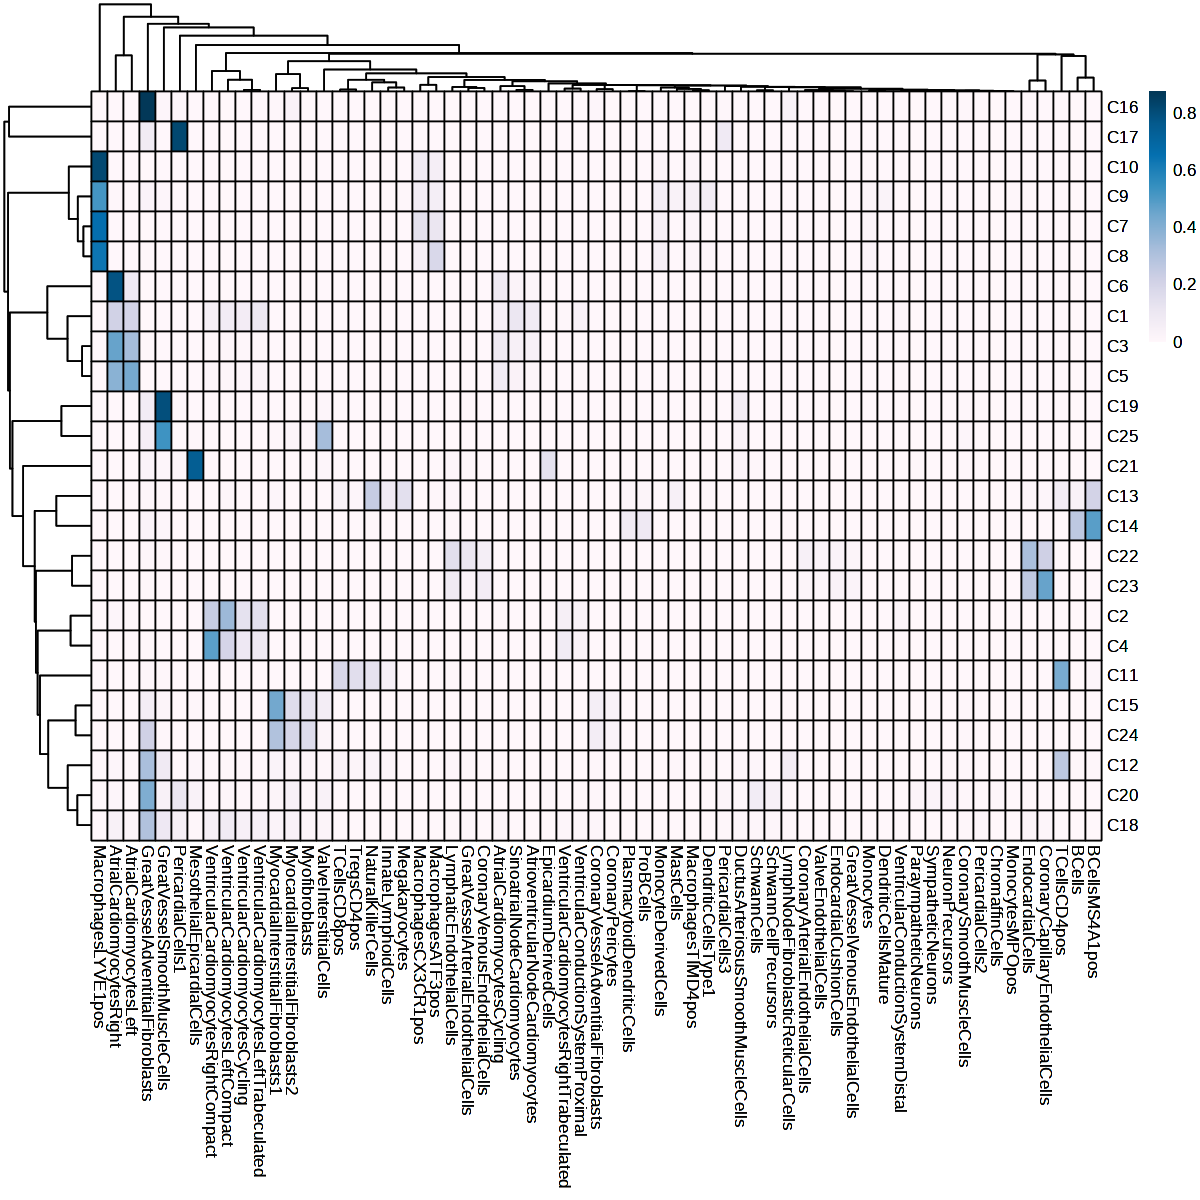

In [27]:
cM <- confusionMatrix(paste0(proj$Clusters), paste0(proj$fine_grain))

library(pheatmap)
cM <- cM / Matrix::rowSums(cM)
p <- pheatmap::pheatmap(
    mat = as.matrix(cM), 
    color = paletteContinuous("whiteBlue"), 
    border_color = "black"
)
p

## Single-cell Embeddings

### UMAP

In [28]:
proj <- addUMAP(
    ArchRProj = proj, 
    reducedDims = "Harmony", 
    name = "UMAP", 
    nNeighbors = 30, 
    minDist = 0.5, 
    metric = "cosine"
)

11:07:26 UMAP embedding parameters a = 0.583 b = 1.334

11:07:27 Read 167022 rows and found 30 numeric columns

11:07:27 Using Annoy for neighbor search, n_neighbors = 30

11:07:27 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

11:08:15 Writing NN index file to temp file /tmp/RtmpSjr0IA/file1c3a1d0b0164

11:08:16 Searching Annoy index using 13 threads, search_k = 3000

11:08:26 Annoy recall = 99.89%

11:08:29 Commencing smooth kNN distance calibration using 13 threads

11:08:39 Initializing from normalized Laplacian + noise

11:09:02 Commencing optimization for 200 epochs, with 8626560 positive edges

11:11:10 Optimization finished

11:11:10 Creating temp model dir /tmp/RtmpSjr0IA/dir1c3a4f664611

11:11:10 Creating dir /tmp/RtmpSjr0IA/dir1c3a4f664611

11:11:20 Changin

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-1c3aca214ca-Date-2023-03-09_Time-11-11-32.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-1c3aca214ca-Date-2023-03-09_Time-11-11-32.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-1c3a58bc8fe7-Date-2023-03-09_Time-11-11-34.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-1c3a58bc8fe7-Date-2023-03-09_Time-11-11-34.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-1c3a7fd8bf0b-Date-2023-03-09_Time-11-11-37.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

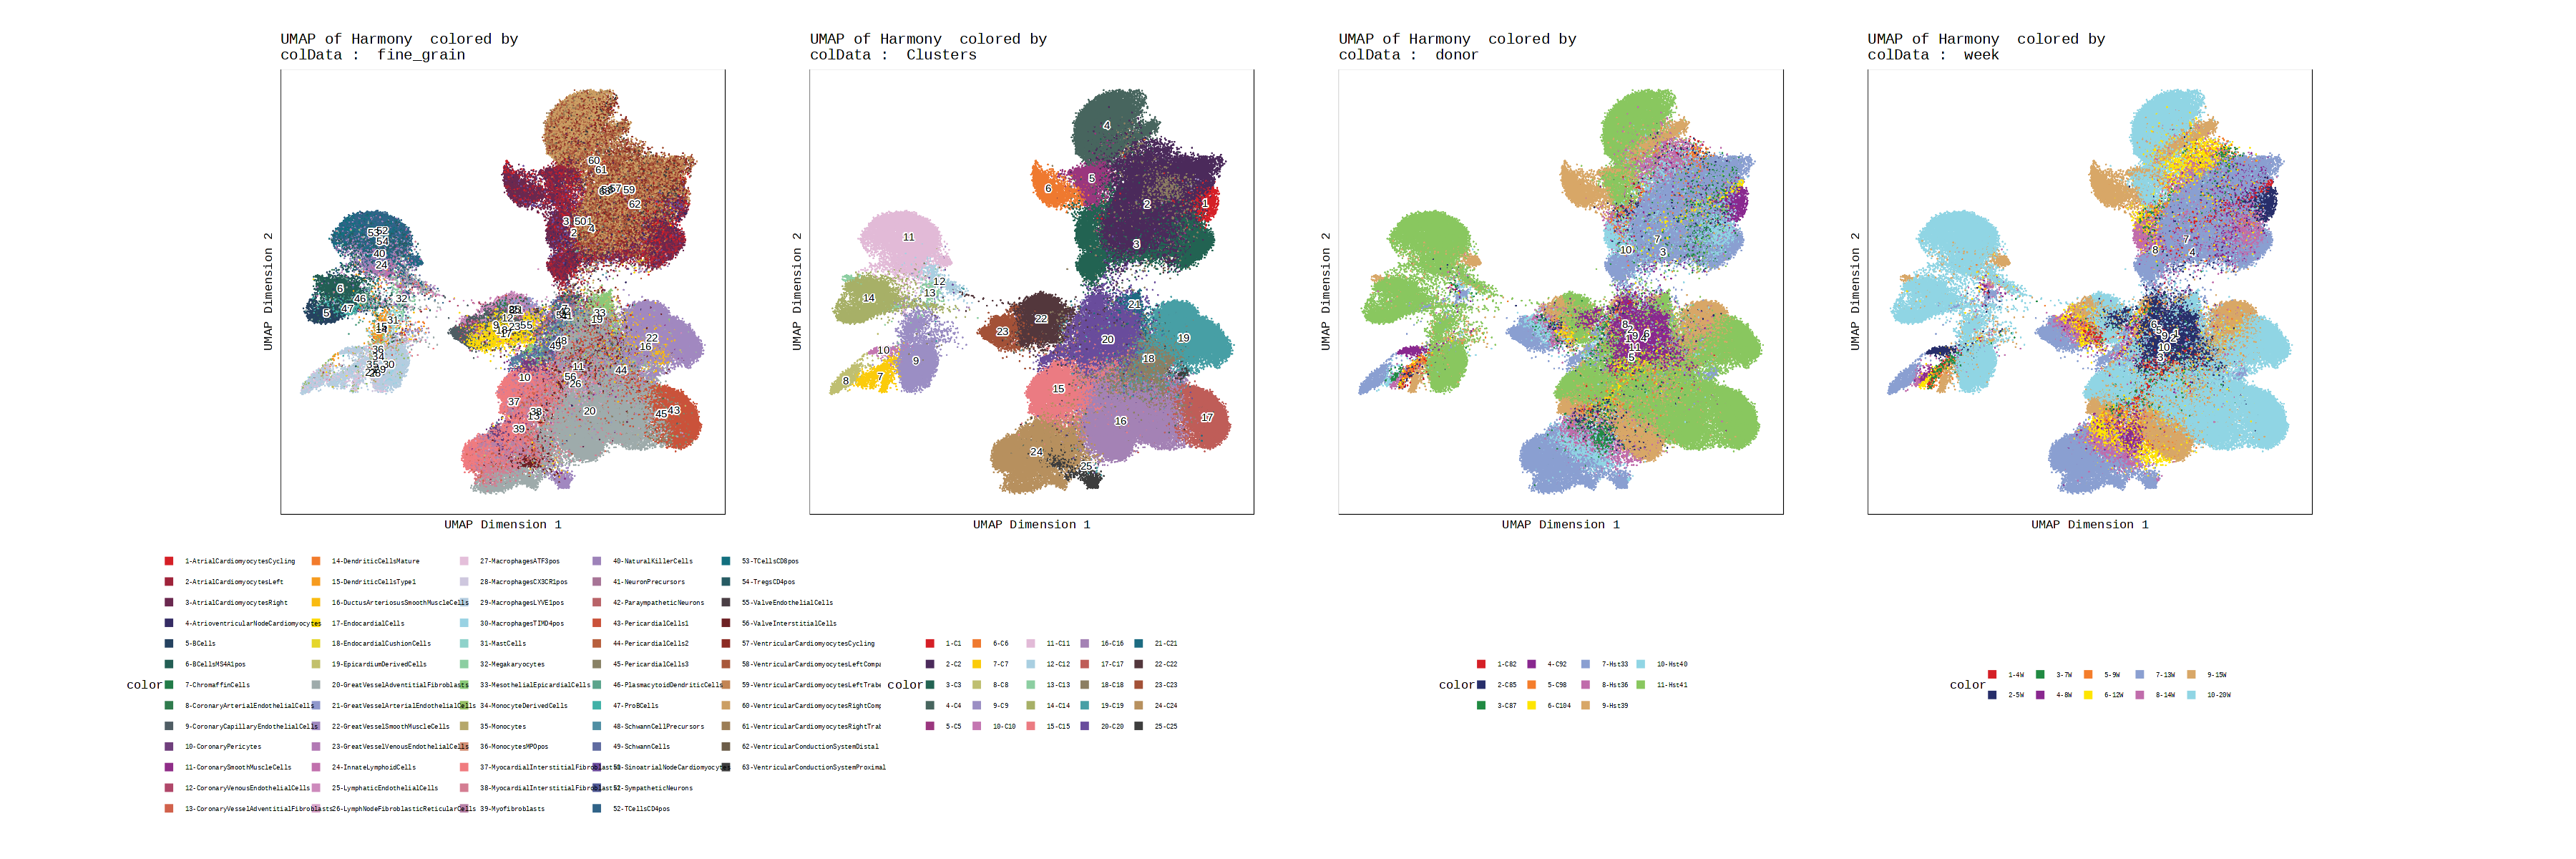

In [29]:
options(repr.plot.width=30, repr.plot.height=10)

p1 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", name = "fine_grain", embedding = "UMAP")
p2 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", name = "Clusters", embedding = "UMAP")
p3 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", name = "donor", embedding = "UMAP")
p4 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", name = "week", embedding = "UMAP")
ggAlignPlots(p1,p2,p3,p4, type = "h")

In [30]:
plotPDF(p1,p2,p3,p4, name = "Global_Plot-UMAPs.pdf", ArchRProj = proj, addDOC = FALSE, width = 8, height = 8)

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!



## Save project

In [31]:
saveArchRProject(ArchRProj = proj, outputDirectory = "project_output", load = FALSE)

Copying Arrow Files...

Copying Arrow Files (1 of 37)

Copying Arrow Files (2 of 37)

Copying Arrow Files (3 of 37)

Copying Arrow Files (4 of 37)

Copying Arrow Files (5 of 37)

Copying Arrow Files (6 of 37)

Copying Arrow Files (7 of 37)

Copying Arrow Files (8 of 37)

Copying Arrow Files (9 of 37)

Copying Arrow Files (10 of 37)

Copying Arrow Files (11 of 37)

Copying Arrow Files (12 of 37)

Copying Arrow Files (13 of 37)

Copying Arrow Files (14 of 37)

Copying Arrow Files (15 of 37)

Copying Arrow Files (16 of 37)

Copying Arrow Files (17 of 37)

Copying Arrow Files (18 of 37)

Copying Arrow Files (19 of 37)

Copying Arrow Files (20 of 37)

Copying Arrow Files (21 of 37)

Copying Arrow Files (22 of 37)

Copying Arrow Files (23 of 37)

Copying Arrow Files (24 of 37)

Copying Arrow Files (25 of 37)

Copying Arrow Files (26 of 37)

Copying Arrow Files (27 of 37)

Copying Arrow Files (28 of 37)

Copying Arrow Files (29 of 37)

Copying Arrow Files (30 of 37)

Copying Arrow Files (31 o

In [32]:
getwd()

[1] "/nfs/team205/heart/anndata_objects/Foetal/multiome_ATAC/ArchR"

In [33]:
proj


           ___      .______        ______  __    __  .______      
          /   \     |   _  \      /      ||  |  |  | |   _  \     
         /  ^  \    |  |_)  |    |  ,----'|  |__|  | |  |_)  |    
        /  /_\  \   |      /     |  |     |   __   | |      /     
       /  _____  \  |  |\  \\___ |  `----.|  |  |  | |  |\  \\___.
      /__/     \__\ | _| `._____| \______||__|  |__| | _| `._____|
    



class: ArchRProject 
outputDirectory: /nfs/team205/heart/anndata_objects/Foetal/multiome_ATAC/ArchR/project_output 
samples(37): BHF_F_Hea11064670_BHF_F_Hea11031823
  BHF_F_Hea11064671_BHF_F_Hea11031824 ...
  HCAHeartST13386009_HCAHeartST13303419
  HCAHeartST13386010_HCAHeartST13303420
sampleColData names(1): ArrowFiles
cellColData names(56): Sample TSSEnrichment ... hb1_score Clusters
numberOfCells(1): 167022
medianTSS(1): 11.614
medianFrags(1): 10338.5

## Save cell index

In [39]:
filetxt<-file("foetal_ATAC_index.txt")
writeLines(proj$cellNames_mod, filetxt)
close(filetxt)